In [12]:
import geopandas as gpd

gdf_loc = gpd.GeoDataFrame.from_file("./gadm41_PHL.gpkg", layer=3)
# gdf_loc = gdf_loc.to_crs(gdf_landcover.crs)
# gdf_landcover = gdf_landcover.to_crs(gdf_loc.crs)

In [14]:
gdf_loc.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
gdf_loc["NAME_1"].unique()

array(['Abra', 'Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay',
       'Antique', 'Apayao', 'Aurora', 'Basilan', 'Bataan', 'Batanes',
       'Batangas', 'Benguet', 'Biliran', 'Bohol', 'Bukidnon', 'Bulacan',
       'Cagayan', 'Camarines Norte', 'Camarines Sur', 'Camiguin', 'Capiz',
       'Catanduanes', 'Cavite', 'Cebu', 'Compostela Valley',
       'Davao del Norte', 'Davao del Sur', 'Davao Oriental',
       'Dinagat Islands', 'Eastern Samar', 'Guimaras', 'Ifugao',
       'Ilocos Norte', 'Ilocos Sur', 'Iloilo', 'Isabela', 'Kalinga',
       'La Union', 'Laguna', 'Lanao del Norte', 'Lanao del Sur', 'Leyte',
       'Maguindanao', 'Marinduque', 'Masbate', 'Metropolitan Manila',
       'Misamis Occidental', 'Misamis Oriental', 'Mountain Province',
       'Negros Occidental', 'Negros Oriental', 'North Cotabato',
       'Northern Samar', 'Nueva Ecija', 'Nueva Vizcaya',
       'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Pampanga',
       'Pangasinan', 'Quezon', 'Quirino', 'Riza

In [16]:
gdf_loc[gdf_loc["NAME_2"]=="Quezon City"]

,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
25834,PHL.47.14.1_1,PHL,Philippines,PHL.47_1,Metropolitan Manila,NA,PHL.47.14_1,Quezon City,NA,Alicia,NA,NA,Barangay,Village,NA,NA,"MULTIPOLYGON (((121.01987 14.66056, 121.02048 ..."
25835,PHL.47.14.2_1,PHL,Philippines,PHL.47_1,Metropolitan Manila,NA,PHL.47.14_1,Quezon City,NA,Amihan,NA,NA,Barangay,Village,NA,NA,"MULTIPOLYGON (((121.06464 14.63194, 121.06451 ..."
25836,PHL.47.14.3_1,PHL,Philippines,PHL.47_1,Metropolitan Manila,NA,PHL.47.14_1,Quezon City,NA,Apolonio Samson,NA,NA,Barangay,Village,NA,NA,"MULTIPOLYGON (((121.00325 14.66466, 121.00336 ..."
25837,PHL.47.14.4_1,PHL,Philippines,PHL.47_1,Metropolitan Manila,NA,PHL.47.14_1,Quezon City,NA,Aurora,NA,NA,Barangay,Village,NA,NA,"MULTIPOLYGON (((121.00472 14.61461, 121.00469 ..."
25838,PHL.47.14.5_1,PHL,Philippines,PHL.47_1,Metropolitan Manila,NA,PHL.47.14_1,Quezon City,NA,Baesa,NA,NA,Barangay,Village,NA,NA,"MULTIPOLYGON (((121.00394 14.67059, 121.00516 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25970,PHL.47.14.137_1,PHL,Philippines,PHL.47_1,Metropolitan Manila,NA,PHL.47.14_1,Quezon City,NA,Veterans Village,NA,NA,Barangay,Village,NA,NA,"MULTIPOLYGON (((121.02706 14.65489, 121.02672 ..."
25971,PHL.47.14.138_1,PHL,Philippines,PHL.47_1,Metropolitan Manila,NA,PHL.47.14_1,Quezon City,NA,Villa Maria Clara,NA,NA,Barangay,Village,NA,NA,"MULTIPOLYGON (((121.06843 14.61768, 121.06782 ..."
25972,PHL.47.14.139_1,PHL,Philippines,PHL.47_1,Metropolitan Manila,NA,PHL.47.14_1,Quezon City,NA,West Kamias,NA,NA,Barangay,Village,NA,NA,"MULTIPOLYGON (((121.04921 14.62949, 121.04906 ..."
25973,PHL.47.14.140_1,PHL,Philippines,PHL.47_1,Metropolitan Manila,NA,PHL.47.14_1,Quezon City,NA,West Triangle,NA,NA,Barangay,Village,NA,NA,"MULTIPOLYGON (((121.03325 14.64692, 121.03328 ..."


In [22]:
import pandas as pd

# Filter for Quezon City
qc = gdf_loc[gdf_loc["NAME_2"] == "Quezon City"].copy()

# Make sure CRS is WGS84 (lat/lon)
qc = qc.to_crs("EPSG:4326")

# Compute centroid for each geometry
qc["centroid"] = qc.geometry.centroid

# Extract longitude and latitude from the centroid
qc["Longitude"] = qc["centroid"].x
qc["Latitude"] = qc["centroid"].y

# Create final DataFrame
result = qc[["NAME_3", "Longitude", "Latitude"]].rename(columns={"NAME_3": "Barangay"})

# Save to CSV
result.to_csv("quezon_city_barangay_centroids.csv", index=False)

print(result.head())


              Barangay   Longitude   Latitude
25834           Alicia  121.023009  14.660310
25835           Amihan  121.066400  14.631866
25836  Apolonio Samson  121.005878  14.654673
25837           Aurora  121.005944  14.616437
25838            Baesa  121.010265  14.668135


C:\Users\nealb\AppData\Local\Temp\ipykernel_24736\245824157.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  qc["centroid"] = qc.geometry.centroid


In [19]:
result.shape

(141, 2)

C:\Users\nealb\AppData\Local\Temp\ipykernel_24736\3811360218.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  qc["centroid"] = qc.geometry.centroid
C:\Users\nealb\AppData\Local\Temp\ipykernel_24736\3811360218.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  qc.centroid.plot(ax=ax, color="red", markersize=50, label="Centroid")


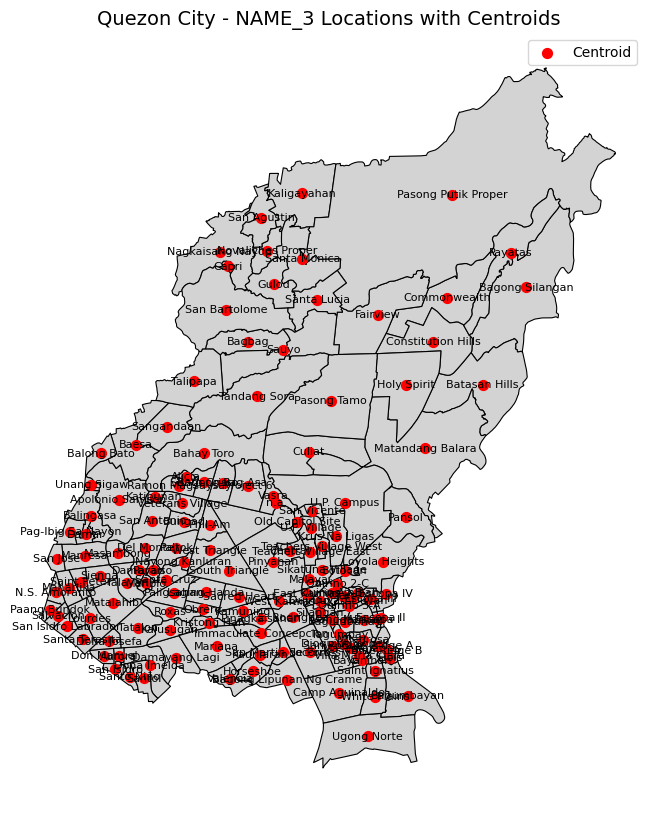

In [20]:
import matplotlib.pyplot as plt

# Filter for Quezon City
qc = gdf_loc[gdf_loc["NAME_2"] == "Quezon City"].copy()

# Compute centroids
qc["centroid"] = qc.geometry.centroid

# Create plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the boundaries of NAME_3 locations
qc.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=0.8)

# Plot the centroids
qc.centroid.plot(ax=ax, color="red", markersize=50, label="Centroid")

# Add labels at centroid positions
for idx, row in qc.iterrows():
    plt.text(row.centroid.x, row.centroid.y, row["NAME_3"],
             fontsize=8, ha="center", va="center")

# Formatting
plt.title("Quezon City - NAME_3 Locations with Centroids", fontsize=14)
plt.legend()
plt.axis("off")

plt.show()
